###Problem Statement:
Leveraging the customer data collected by Aerofit consisting of the Gender, Age, Income, Weekly Usage, Fitness, Marital Status and Miles run on treadmill to identify characteristics which make the customer buy a particular treadmill out of KP281, KP481 and KP781 in the increasing order of expenditures. Further providing recommendations of treadmill for future orders/customers based on their profile.

In [1]:
# Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Importing Dataset
df = pd.read_csv('/content/aerofit_treadmill.txt')
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
# General info about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
# Shape of DataFrame
df.shape

(180, 9)

In [5]:
# Datatypes of each columns in a DataFrame
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
# Number of Null Values in a DataFrame
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [8]:
# Unique values in each columns in a Data Frame
for i in df.columns:
  print(i,df[i].nunique())


Product 3
Age 32
Gender 2
Education 8
MaritalStatus 2
Usage 6
Fitness 5
Income 62
Miles 37


#Value Counts of each Columns in a Data Frame

In [9]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [10]:
df['Age'].value_counts()

,count
Age,
25,25
23,18
24,12
26,12
28,9
33,8
35,8
22,7
30,7


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [12]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [13]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [14]:
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [15]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [16]:
df['Income'].value_counts()

,count
Income,
45480,14
52302,9
53439,8
54576,8
46617,8
...,...
85906,1
99601,1
103336,1


In [17]:
df['Miles'].value_counts()

,count
Miles,
85,27
95,12
66,10
75,10
47,9
106,9
113,8
94,8
53,7


#Compare Continueous Variables


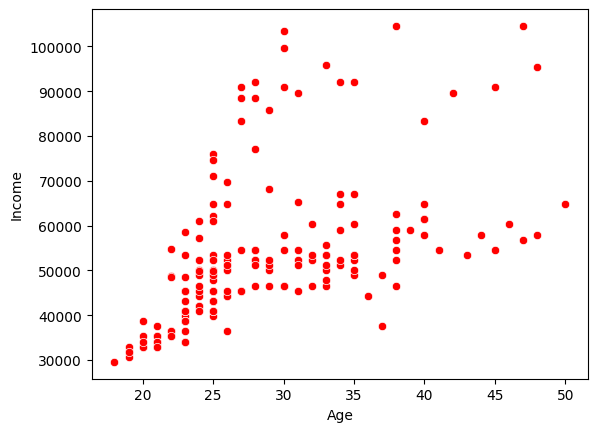

In [18]:
# Age and Income:
sns.scatterplot(x=df['Age'],y=df['Income'],color='red')
plt.show()

The above ScatterPlot shows that when Age increases Income increases as well.

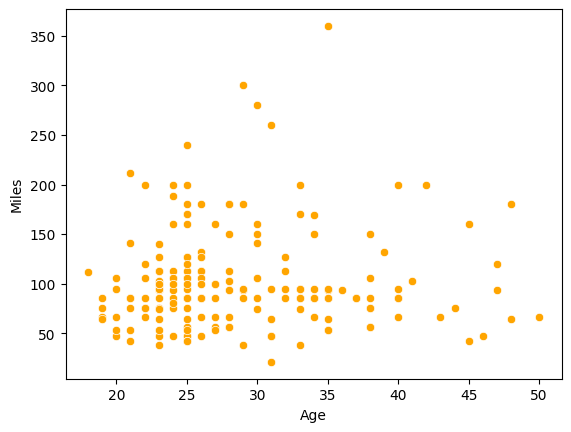

In [19]:
# Compare Age and Miles
sns.scatterplot(x='Age',y='Miles',data=df,color='orange')
plt.show()

Customer with Age limit from 35 to 38 has run the maximum Miles of above 360, Most of the highest Miles records are from the age limit of 27 to 35

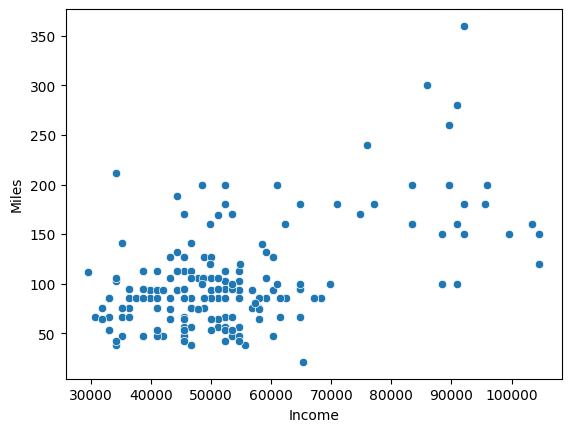

In [20]:
# Compare Income and Miles
sns.scatterplot(x='Income',y='Miles', data=df)
plt.show()

People with highest Income has run the highest Miles. Both Income and Miles are positively corelated

In [57]:
# we can do correlation between the columns of the dataframe:
# we can change the categorical columns by replacing with 0,1,2
df_copy = df.copy()
df_copy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)
df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)


<ipython-input-57-9c5db2895e1a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
<ipython-input-57-9c5db2895e1a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
<ipython-i

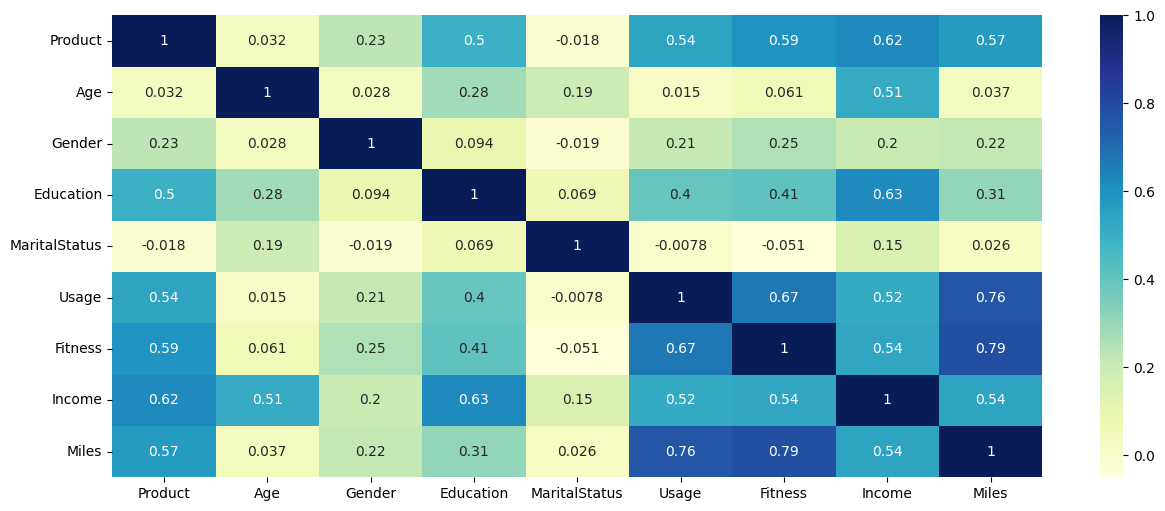

In [58]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

* Product is highly correlated with Miles, Income, Fitness, Usage and Education
* Age is highly correlated with Income and some what correlated with Education and MaritalStatus
* Gender is correlated with Product, Fitness and Usage
* Education is correlated to Age and Miles. It's highly correlated to Income.
 It's sufficiently correlated to Usage and Fitness too.
* Marital Status has somewhat correlated with Age and Income
* Usage is highly correlated with Miles which means high Usage results in high miles and high fitness.  Its correlated with Income, Education and Product as well
* Fitness is correlated with Income, Usage, Miles and Product.


# Finding Outliers using Box Plot

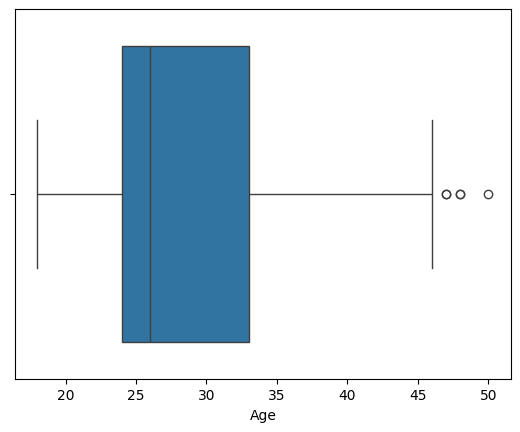

In [21]:
# BoxPlot for Age Column
sns.boxplot(x=df['Age'])
plt.show()

50% of the Age limit lies between 24 to 34 and Outliers are at above 46

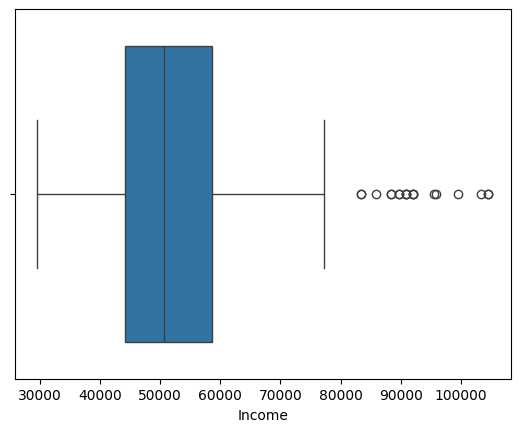

In [22]:
# Boxplot for Income column
sns.boxplot(x=df['Income'])
plt.show()

50% of the Income ranges from 45,000 to 60,000. Incomes which ranges above 80000 are considered as Outliers

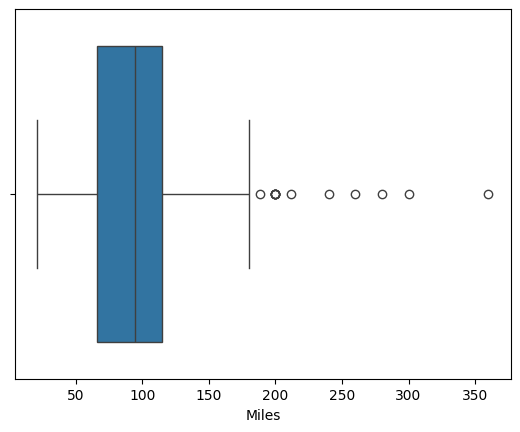

In [23]:
# Boxplot for Miles Column
sns.boxplot(x=df['Miles'])
plt.show()

Miles above 180 are considered as Outlier.  50% of the Miles data is from 60 to 110

### There are outliers in our dataset, since we want to keep the originality of the dataset and considering there is only 180 rows in this dataset, We are not going to remove them.  

# Range of Age, Miles and Income as per the Product Purchase Using Histogram

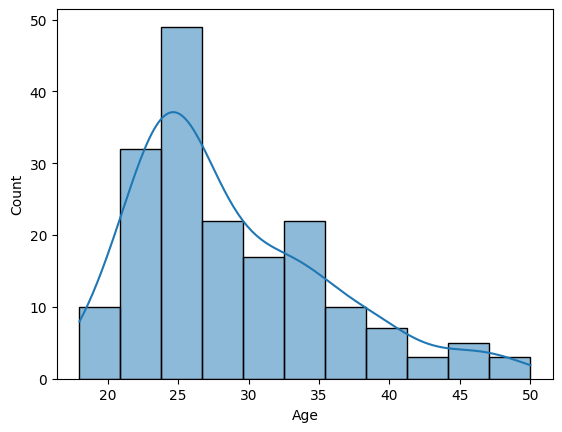

In [60]:
sns.histplot(df['Age'],kde=True)
plt.show()

Maximum number of Tredmills are bought by customers with age range of 24 to 33

In [61]:
# Create Bins for Age Category
# age less than
bins=[0,19,25,30,40,70]
label = ['Below 20','20-25','25-30','30-40','Above 40']
df['Age_Catg'] = pd.cut(df['Age'],bins=bins,labels=label)

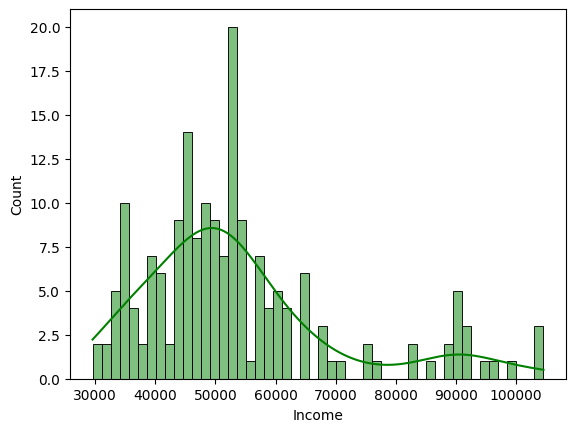

In [69]:
sns.histplot(df['Income'],bins=50,kde=True,color='green')
plt.show()

Max Income is at a range of 45,000 to 55,000

In [70]:
# Create Bins for Income Category
bin=[0,30000,40000,50000,60000,70000,110000]
labels=['Below 30k','30k-40','40k-50k','50k-60k','60k-70k','Above 70k']
df['Income_Catg']=pd.cut(df['Income'],bins=bin,labels=labels)

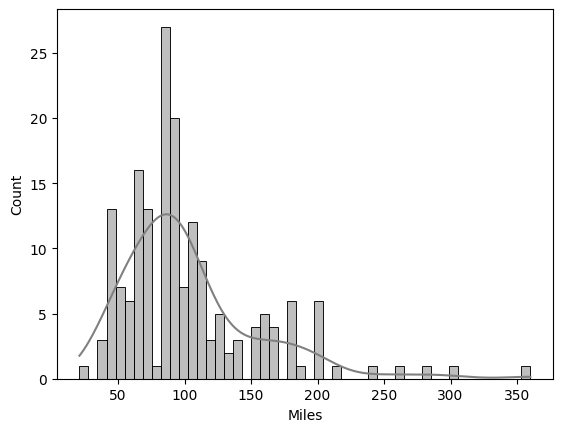

In [73]:
sns.histplot(df['Miles'],kde=True,bins=50,color='grey')
plt.show()

Max Miles is at a range of 75 to 110

In [74]:
# Create Category for Miles
bin = [0,50,100,150,200,380]
label = ['Below 50','50-100','100-150','150-200','Above 200']
df['Miles_Catg']= pd.cut(df['Miles'],bins=bin, labels=label)

In [75]:
pd.crosstab(df['Gender'],df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [76]:
# Probability of Buying each Products as per Gender
round(pd.crosstab(df['Gender'], df['Product'],margins=True,normalize='index'),2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32
All,0.44,0.33,0.22


Probability of Male customers buying Treadmill - KP781 is 32% where as for female is at 9%
For Buying Treadmill-KP281 Probability of Male customers is at 38% and Female Customers  is at 53% hence female is higher than male.
For KP481 female is higher than 8% compare to male.

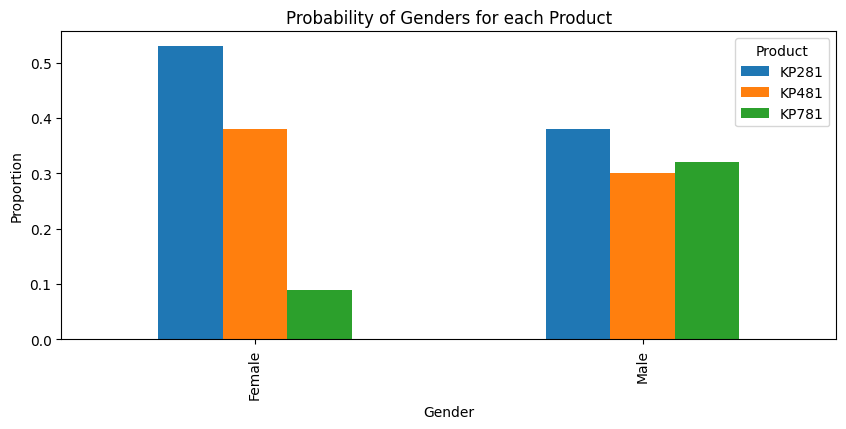

In [78]:
Gender_prob = round(pd.crosstab(df['Gender'], df['Product'],normalize='index'),2)
ax=Gender_prob.plot(kind ='bar', title = 'Gender', figsize = (10,4))
plt.title('Probability of Genders for each Product')
ax.set_ylabel('Proportion')
plt.show()

In [33]:
# Probability of Buying each Products as per Marital Status
round(pd.crosstab(df['MaritalStatus'],df['Product'],margins=True, normalize='index'),3)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.449,0.336,0.215
Single,0.438,0.329,0.233
All,0.444,0.333,0.222


Marital Status has NO effect on the Purchase of Treadmills, since both Single and Partnered values are somewhat same.

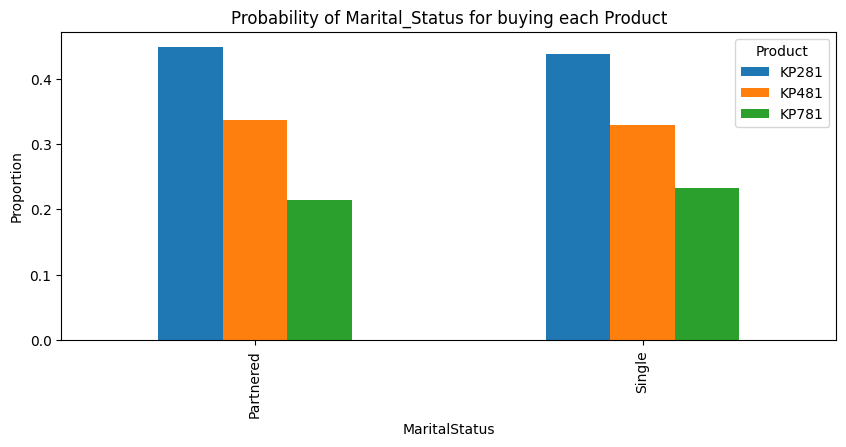

In [79]:
Marital_prob = round(pd.crosstab(df['MaritalStatus'],df['Product'],normalize='index'),3)
ax=Marital_prob.plot(kind ='bar', title = 'Marital_Status', figsize = (10,4))
ax.set_ylabel('Proportion')
plt.title('Probability of Marital_Status for buying each Product')
plt.show()

In [80]:
# Probability of Buying each Products as per Education
round(pd.crosstab(df['Education'],df['Product'],margins=True,normalize='index'),3)

Product,KP281,KP481,KP781
Education,,,
12,0.667,0.333,0.000
13,0.600,0.400,0.000
14,0.545,0.418,0.036
15,0.800,0.200,0.000
16,0.459,0.365,0.176
18,0.087,0.087,0.826
20,0.000,0.000,1.000
21,0.000,0.000,1.000
All,0.444,0.333,0.222


P(KP781|Education=18) = 82.6% , P(KP281|Education=15)= 80%
Probability for KP281 and KP481 is high when Education range is at 12 to 16 . when Education range above 18 KP781 is higher

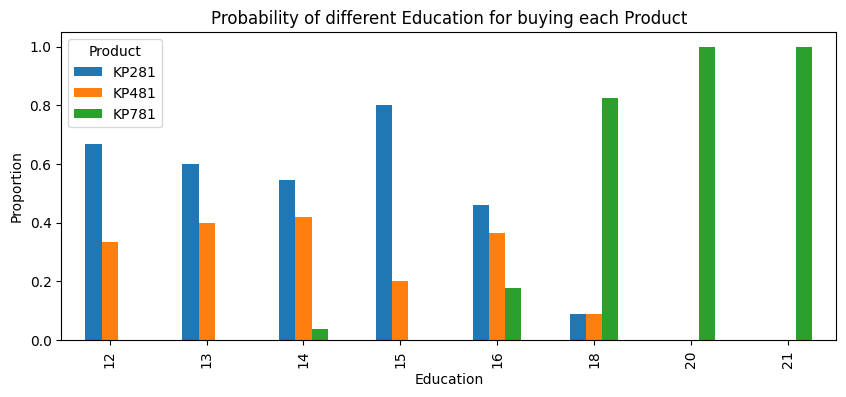

In [81]:
Edu_prob = round(pd.crosstab(df['Education'],df['Product'],normalize='index'),3)
ax=Edu_prob.plot(kind ='bar', title = 'Education', figsize = (10,4))
ax.set_ylabel('Proportion')
plt.title('Probability of different Education for buying each Product')
plt.show()

Customer with higher education has high probability of buying KP781(expensive Tredmill) and Customers with low Education has high Probability of buying the KP281.

In [82]:
# Probability of Buying each Products as per Usage
round(pd.crosstab(df['Usage'],df['Product'],margins=True,normalize='index'),3)

Product,KP281,KP481,KP781
Usage,,,
2,0.576,0.424,0.000
3,0.536,0.449,0.014
4,0.423,0.231,0.346
5,0.118,0.176,0.706
6,0.000,0.000,1.000
7,0.000,0.000,1.000
All,0.444,0.333,0.222


P(KP781|Usage=6)=100% and P(KP781|Usage=7) =100%
P(KP281|Usage=2) = 0.576
P(KP481|Usage=3) = 0.449
People who use 6 or 7 days a week use KP781 while more than 50% of the people who use 2 or 3 days use KP281

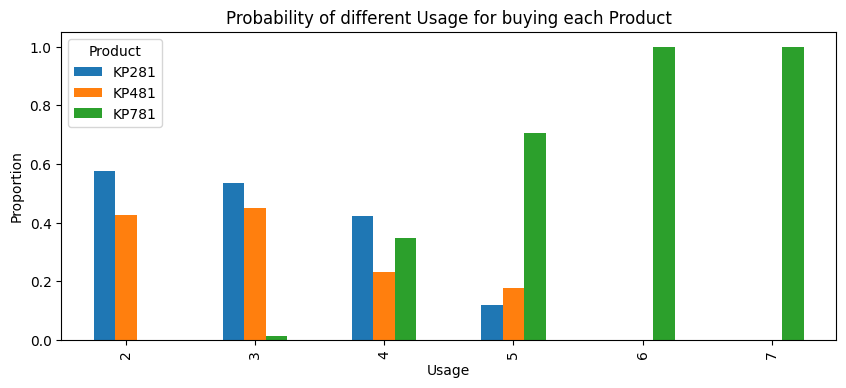

In [84]:
Usage_prob = round(pd.crosstab(df['Usage'],df['Product'],normalize='index'),3)
ax = Usage_prob.plot(kind ='bar', title = 'Usage', figsize = (10,4))
ax.set_ylabel('Proportion')
plt.title('Probability of different Usage for buying each Product')
plt.show()

Customers who bought the KP781 has the highest Usage compare to Customers who bought the KP281 and KP481 Model

In [85]:
# Probability of Buying each Products as per Fitness
round(pd.crosstab(df['Fitness'],df['Product'],margins=True,normalize='index'),3)

Product,KP281,KP481,KP781
Fitness,,,
1,0.500,0.500,0.000
2,0.538,0.462,0.000
3,0.557,0.402,0.041
4,0.375,0.333,0.292
5,0.065,0.000,0.935
All,0.444,0.333,0.222


P(KP281|Fitness=1)=0.5 , P(KP481|Fitness=1)=0.5
P(KP281|Fitness=2)=0.538 , P(KP481|Fitness=2)=0.462
P(KP781|Fitness=5)=0.935
90% of the people who has fitness level of 5 use KP781 and none of them who has fitness level below 3 uses KP781.  50% of the people who has fitness level of 3 or below uses KP281

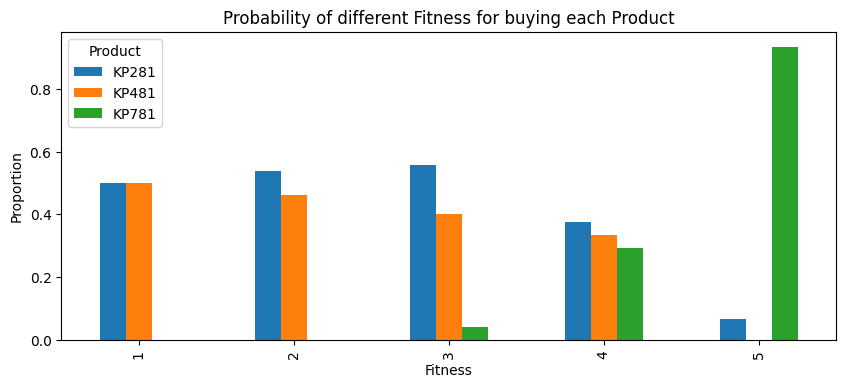

In [87]:
Fitness_prob = round(pd.crosstab(df['Fitness'],df['Product'],normalize='index'),3)
ax = Fitness_prob.plot(kind ='bar', title = 'Fitness', figsize = (10,4))
ax.set_ylabel('Proportion')
plt.title('Probability of different Fitness for buying each Product')
plt.show()

Customers who bought the KP781 model has highest Fitness rated compare to customers who bought KP281 and KP481

In [88]:
# Probability of Buying each Products as per Age_Catagory
round(pd.crosstab(df['Age_Catg'],df['Product'],margins=True,normalize='index'),3)

Product,KP281,KP481,KP781
Age_Catg,,,
Below 20,0.800,0.200,0.000
20-25,0.405,0.365,0.230
25-30,0.512,0.171,0.317
30-40,0.396,0.479,0.125
Above 40,0.500,0.167,0.333
All,0.444,0.333,0.222


P(KP281|Age_catg='Below 20') = 0.80 ,
P(KP781|Age_catg='Above 40') = 0.33
* People who are below 20 has no chance of buying KP781, since they have high chance of buying KP281

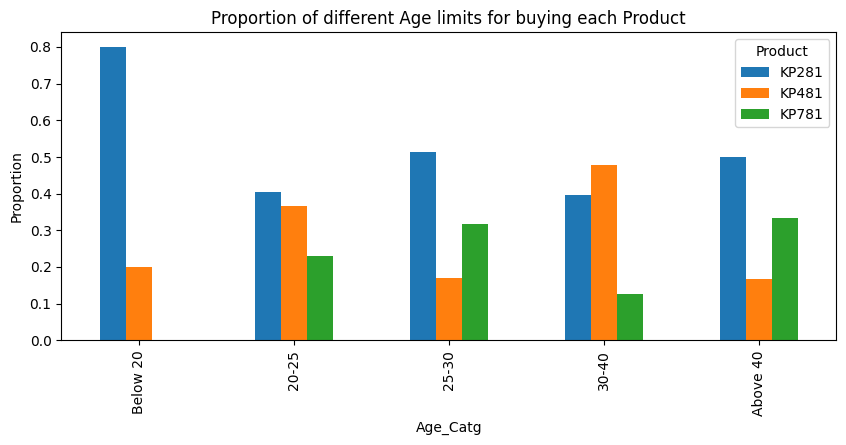

In [93]:
age_cat_prop = round(pd.crosstab(df['Age_Catg'],df['Product'],normalize='index'),3)
ax=age_cat_prop.plot(kind ='bar', title = 'Age_Catg', figsize = (10,4))
ax.set_ylabel('Proportion')
plt.title('Proportion of different Age limits for buying each Product')
plt.show()

Customers who are below 20yrs old has bought high number of KP281 model and Customer above 40yrs have bought more KP781 model Tredmill

In [94]:
# Probability of Buying each Products as per Income_Catagory
round(pd.crosstab(df['Income_Catg'],df['Product'],margins=True,normalize='index'),3)

Product,KP281,KP481,KP781
Income_Catg,,,
Below 30k,1.000,0.000,0.000
30k-40,0.710,0.290,0.000
40k-50k,0.490,0.412,0.098
50k-60k,0.473,0.418,0.109
60k-70k,0.316,0.368,0.316
Above 70k,0.000,0.000,1.000
All,0.444,0.333,0.222


P(KP281|Income_catg=Below 30K) = 100%  ,  
P(KP781|Income_catg=Above 70k) = 100%  ,  
P(KP281|Income_catg=30K-40K) = 0.71  
* People who have salary above 70k only use KP781 and people below 20 only use KP281



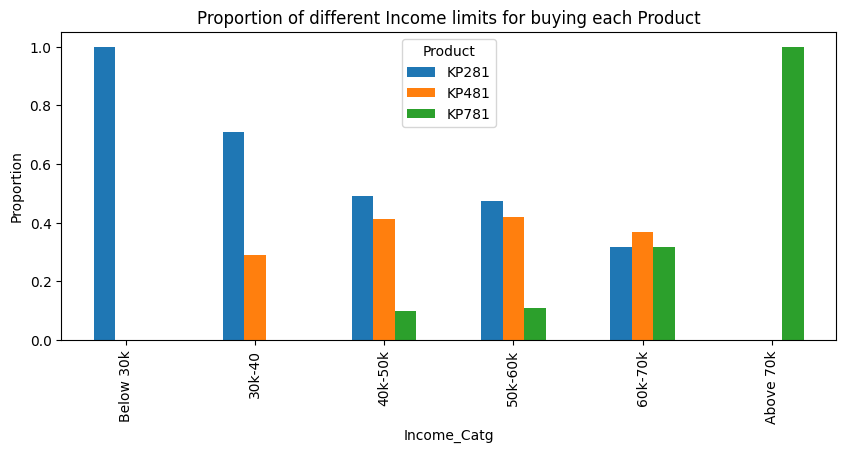

In [92]:
Income_cat_prop = round(pd.crosstab(df['Income_Catg'],df['Product'],normalize='index'),3)
ax=Income_cat_prop.plot(kind ='bar', title = 'Income_Catg', figsize = (10,4))
ax.set_ylabel('Proportion')
plt.title('Proportion of different Income limits for buying each Product')
plt.show()

Customers with highest Income above 70k has bought KP781 and customers with Income below 30k has bought KP281 Model

In [95]:
# Probability of Buying each Products as per Miles_Catagory
round(pd.crosstab(df['Miles_Catg'],df['Product'],margins=True,normalize='index'),3)

Product,KP281,KP481,KP781
Miles_Catg,,,
Below 50,0.706,0.294,0.000
50-100,0.515,0.402,0.082
100-150,0.421,0.342,0.237
150-200,0.091,0.091,0.818
Above 200,0.000,0.167,0.833
All,0.444,0.333,0.222


P(KP281|Miles_catg=Below 50) = 0.706
P(KP481|Miles_catg=50-100) = 0.402  
P(KP781|Miles_catg=150-200) = 0.818
* People who ran above 200 and above 150, 80% of them uses KP781 and people who are below 50 uses KP281


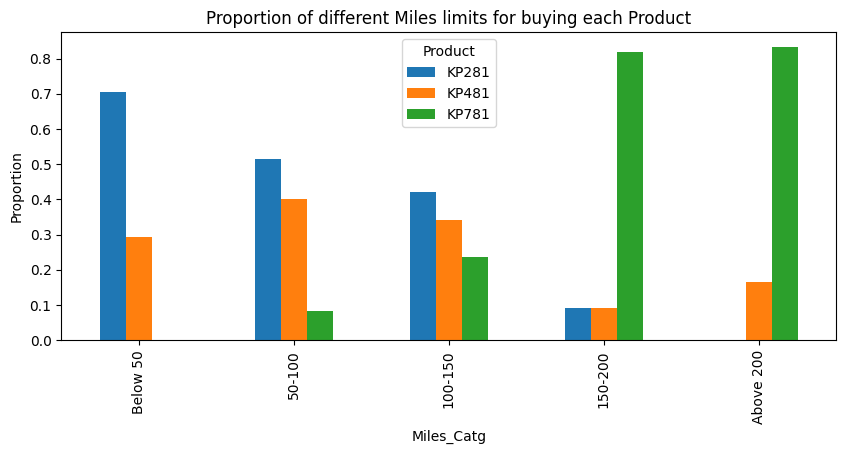

In [96]:
Miles_cat_prop = round(pd.crosstab(df['Miles_Catg'],df['Product'],normalize='index'),3)
ax=Miles_cat_prop.plot(kind ='bar', title = 'Miles_Catg', figsize = (10,4))
ax.set_ylabel('Proportion')
plt.title('Proportion of different Miles limits for buying each Product')
plt.show()

Customers who bought KP781 model tredmill has run max miles of 150 and above

# Final Conclusion:
For expensive model - KP781
Customers who ran more than 150miles and with Income greater than 70,000 has purchased the KP781 Model
Customers who bought KP781 has higher Fitness rating of 5. Hence this model is not suggested for customers who have low Income range, Education below 14, Usage below 4 and Fitness below 3 since Probability of customers buying this Model is very less.  Most of the purchase are made by Male customers.

Model: KP481
Customers with Income 30k to 60k will mostly likely buy this model.  Customers with Age ramge of 20 to 25 and 30 to 40, Education level of 12 to 15yrs will most likely buy this model.  Probability of Female customers to buy this Model is slightly higher than the Male customers

Model: KP281
Customers with Education level of 12 to 15yrs, Age of below 20, Income range of below 30k will mostly likely buy this model. Most of the purchases are made by the Female customers.  The Probability of Femal customers buying this model is higher than the Male customers.

As a summary, if a customer has higher Education, higher Income and with more involvment in Fitness with a rating of 5 he will most likely to buy the KP781 Model.  Customers will age below 20, with Income range of below 30k and with Education level of 12 to 15 will most likely buy the KP281 model.  Customers with Income range slightly above 30k and Age limit of 30 to 40 will most likely to buy the KP481 Model.
Gender wise, KP781 is preferred by Male, KP481 is preferred by both Female and Male and KP281 is preferred more by Female customers compare to Male customers.